# Binning Continous Data 

e.g Age 

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

print('done')

done


In [4]:
sns.load_dataset('titanic')
df = sns.load_dataset('titanic')

In [5]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False


In [6]:
df.shape

(891, 15)

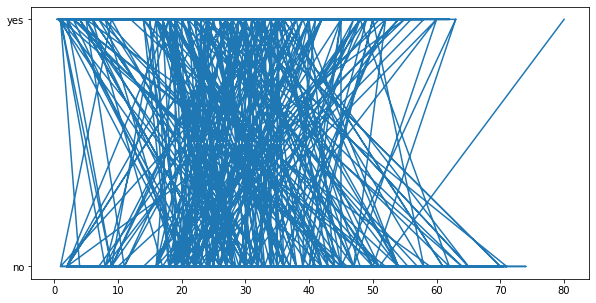

In [7]:
plt.figure(figsize=(10,5))
plt.plot(df.age, df.alive)

In [8]:
# we cant make sense of the ages as individual 
# values, hence the need for binning 

### Age distribution

In [9]:
print("youngest", df.age.min())
print("oldest", df.age.max())

youngest 0.42
oldest 80.0


<AxesSubplot:title={'center':'Age Distribution'}, ylabel='Frequency'>

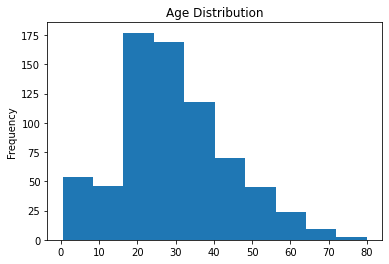

In [10]:
# plot a histogram 
df.age.plot(kind='hist', title='Age Distribution')

In [11]:
# create bins, with pandas cut() or manually

In [12]:
# pandas cut()
# syntax 
# pd.cut(df.column, num0fbins)

In [13]:
A = pd.cut(df.age, 5)

This returns a series of categorical objects that provide bins we can use in splitting the data

In [14]:
for x in A.unique():
    print(x)

(16.336, 32.252]
(32.252, 48.168]
nan
(48.168, 64.084]
(0.34, 16.336]
(64.084, 80.0]


- '(' means the value is included in the bin 

- ']' means that the value is not included in the bin 

### Create custom bins 

In [15]:
print("youngest", df.age.min())
print("oldest", df.age.max())

youngest 0.42
oldest 80.0


In [16]:
bins = [0,10,25,40,65,85]

In [17]:
B = pd.cut(df.age, bins)

In [18]:
for x in B.unique():
    print(x)

(10.0, 25.0]
(25.0, 40.0]
nan
(40.0, 65.0]
(0.0, 10.0]
(65.0, 85.0]


### add labels 


In [19]:
# create a new column in the dataset 
# for age_category

In [20]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [21]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [22]:
df['age_cat'] = pd.cut(df.age, bins=bins) 
# will use the numeric labels 

In [23]:
df['age_cat'] = pd.cut(df.age, bins=bins, labels=['child',
                                                 'teen',
                                                 'youth',
                                                 'adult',
                                                 'aged']) 
# will use custom labels 
# labels should be no_of_bins - 1

In [24]:
df.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,youth
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,youth


# Practics Qs

1. Draw bar charts age_cat vs alive, sex, fare

2. Draw Pie Charts age_cat vs alive, sex, fare etc.

<AxesSubplot:>

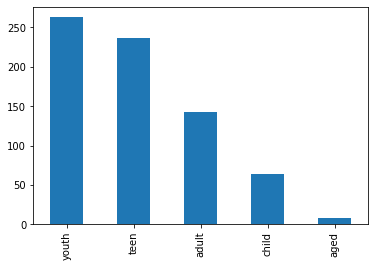

In [25]:
age_cat_cnt = df['age_cat'].value_counts()
age_cat_cnt.plot(kind='bar')

In [26]:
temp = age_cat_cnt
temp = pd.DataFrame(temp)
temp = temp.reset_index()
temp = temp.rename({'index':'age_cat','age_cat':'count'}, axis=1)
temp

,age_cat,count
0,youth,263
1,teen,237
2,adult,142
3,child,64
4,aged,8


<AxesSubplot:ylabel='age_cat'>

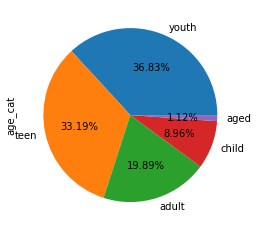

In [27]:
age_cat_cnt.plot(kind='pie', autopct='%0.2f%%')

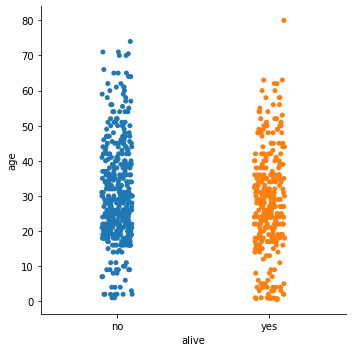

In [28]:
sns.catplot(data=df, x='alive', y='age')

<AxesSubplot:xlabel='age_cat', ylabel='age'>

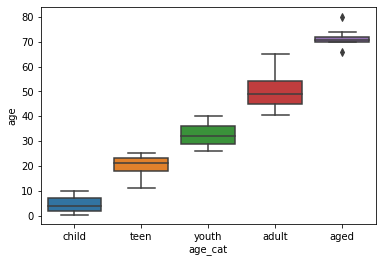

In [29]:
sns.boxplot(data=df, x='age_cat', y='age')

[]

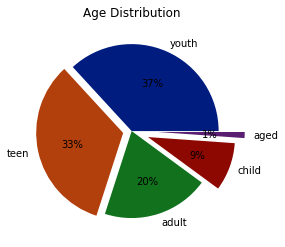

In [30]:
color = sns.color_palette('dark')
plt.pie(temp['count'], labels=temp.age_cat, colors=color,
        explode=[0,0.1,0,0.2,0.3], autopct='%0.f%%')
plt.title('Age Distribution')
plt.plot()

# Assignment 

1. find out how to create multiple bins e.g 100s of values 

2. From the titanic dataset, how many people based on the age categories

- survived ?

- did not survive ?

# Encoding 

Encoding is simply converting categorical variables into numeric input 

Categorical data is non-numeric, grouped in some way

It usually will contain a list of finite values 

e.g Hair color ['black', 'brown','red']

In [31]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_cat
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,teen
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,youth


In [32]:
df['class'].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [33]:
df['who'].unique()

array(['man', 'woman', 'child'], dtype=object)

In [34]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [35]:
# check nans
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
age_cat        177
dtype: int64

In [36]:
# df[df['age_cat'] == 'youth']

In [37]:
# encode the sex column 
# We can decide to use manual encoding 
map_dict = {
    'male': 1,
    'female': 2
}

# or the class column 
map_dict = {
    'First' : 1, 
    'Second': 2, 
    'Third': 3
}

This simple mapping above can cause the model to assume that there was some order or relationship to the variables

e.g a statistical model would assume that second class and thrid class are more closely related than First class and third class 

In [38]:
# use dtypes and category type 
# create new col with cat.codes

In [39]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
age_cat        category
dtype: object

In [42]:
df['alive'] = df['alive'].astype('category')

In [43]:
df['alive'].dtype

CategoricalDtype(categories=['no', 'yes'], ordered=False)

In [44]:
df['alive'].cat.codes

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Length: 891, dtype: int8

In [58]:
# all the category types have a cat.codes method 
# e.g
df['class'].cat.codes

0      2
1      0
2      2
3      0
4      2
      ..
886    1
887    0
888    2
889    0
890    2
Length: 891, dtype: int8

In [60]:
df['age_cat'].cat.codes.unique()

array([ 1,  2, -1,  3,  0,  4], dtype=int8)

In [45]:
# -1 here is for the Nan values 

### pandas get dummies method

In [50]:
# first check the column you want to encode 

In [52]:
df["class"].unique()

['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']

In [53]:
#  temp dataframe to hold the values 

temp =  pd.DataFrame(df['class'])
temp.tail(3)

,class
888,Third
889,First
890,Third


In [54]:
# pd.getdummies 

encoded = pd.get_dummies(temp['class'])
encoded.tail(3)

,First,Second,Third
888,0,0,1
889,1,0,0
890,0,0,1
